In [7]:
import os
import matplotlib.image as img 
import numpy as np 
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import random
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [74]:
def process_data(folder): 
    gender = "";                                
    images = []; 
    dfs = pd.read_excel("./data/adultFaces/full_att_scores/demographics/demographic-others-labels.xlsx", sheet_name="Final Values")
    for subdir, dirs, files in os.walk(folder):
        for f in files:
            d = {};
            img = cv2.imread(os.path.join(subdir,f))
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img/255.0, (250, 250))
                for n, gender in zip(dfs["Filename"], dfs["Gender"]):
                    if(n == f):
                        if(gender == 0):
                            d["gender"] = "female"
                        else:
                            d["gender"] = "male"
                        d["name"] = f
                        d["image"] = img
                        images.append(d)
    return images


path = "./data/adultFaces/faceImages"
img_info = process_data(path)

In [75]:
print(len(img_info))
print(img_info[:20])

2222
[{'gender': 'male', 'name': 'Google_1_Paul Reno_1_oval.jpg', 'image': array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,

In [81]:
counter = 0;
for i in img_info:
    if i["gender"] == "female":
        counter += 1
print(counter)

print(img_info[0]["image"].shape)

953
(256, 208, 3)


In [62]:
labels = ["female", "male"]

males, females = [], [];
male_labels, female_labels = [], []

for info in img_info:
    if(info["gender"]=="male"):
        males.append(info["image"])
        male_labels.append(labels.index(info["gender"]))
    else:
        females.append(info["image"])
        female_labels.append(labels.index(info["gender"]))
        
rand_males = random.sample(males, 953) 
rand_labels = random.sample(male_labels, 953)

In [63]:
images, all_labels = np.array(rand_males+females), np.array(rand_labels+female_labels)
train_images, test_images, train_labels, test_labels = train_test_split(images, all_labels, train_size=0.5,test_size=0.5)
train_labels = train_labels.reshape(953, 1)
test_labels = train_labels.reshape(953, 1)

In [65]:
# print what percentage of males vs females
num_males = 0;
counter = 0;
for g in train_labels:
    num_males = g[0] + num_males
    
print("Percentage of males in training data set:", (num_males/(len(train_labels)))*100)

Percentage of males in training data set: 49.10807974816369


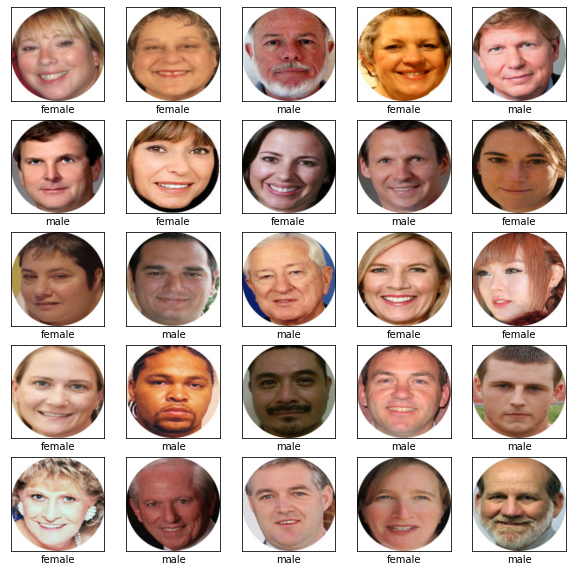

In [66]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels[train_labels[i][0]])
plt.show()

In [67]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [68]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [69]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [70]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 248, 248, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 124, 124, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 122, 122, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 59, 59, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 222784)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

In [71]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
30/30 [==============================] - 30s 1s/step - loss: 1.0909 - accuracy: 0.6306 - val_loss: 0.8775 - val_accuracy: 0.4921
Epoch 2/10
30/30 [==============================] - 30s 1s/step - loss: 0.4558 - accuracy: 0.7870 - val_loss: 0.9075 - val_accuracy: 0.5068
Epoch 3/10
30/30 [==============================] - 29s 963ms/step - loss: 0.3757 - accuracy: 0.8426 - val_loss: 1.4916 - val_accuracy: 0.4932
Epoch 4/10
30/30 [==============================] - 29s 955ms/step - loss: 0.3000 - accuracy: 0.8804 - val_loss: 1.6405 - val_accuracy: 0.4911
Epoch 5/10
30/30 [==============================] - 31s 1s/step - loss: 0.2184 - accuracy: 0.9119 - val_loss: 1.7137 - val_accuracy: 0.4900
Epoch 6/10
30/30 [==============================] - 28s 930ms/step - loss: 0.1680 - accuracy: 0.9412 - val_loss: 2.1523 - val_accuracy: 0.4858
Epoch 7/10
30/30 [==============================] - 28s 930ms/step - loss: 0.1582 - accuracy: 0.9391 - val_loss: 2.3294 - val_accuracy: 0.4879
Epoch 8/

30/30 - 6s - loss: 2.5565 - accuracy: 0.4911


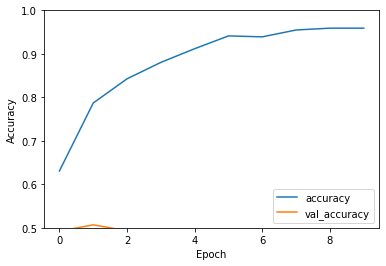

In [72]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [73]:
print(test_acc)

0.49108079075813293
